In [1]:
import torch
import matplotlib.pyplot as plt

In [18]:
_ = torch.manual_seed(911)

In [19]:
n = 8000000

In [20]:
x = torch.linspace(0., 11., n)

In [21]:
y = -0.5*x + 2 + torch.normal(mean=torch.zeros(n), std=1)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.00025, random_state=42)

In [24]:
x_valid.shape

torch.Size([2000])

In [25]:
x_train.shape

torch.Size([7998000])

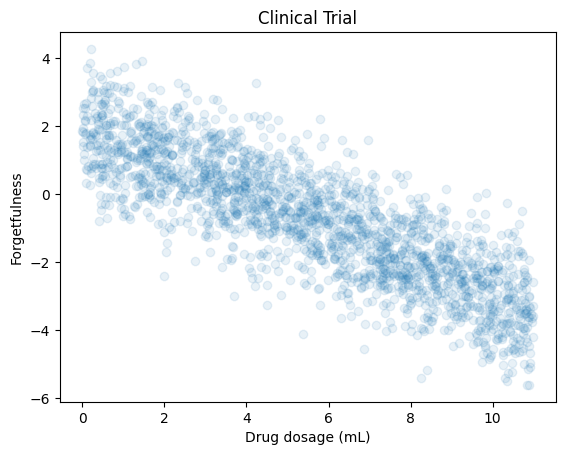

In [26]:
fig, ax = plt.subplots()
plt.title("Clinical Trial")
plt.xlabel("Drug dosage (mL)")
plt.ylabel("Forgetfulness")
_ = ax.scatter(x_valid, y_valid, alpha=0.1)

In [27]:
def regression(my_x, my_m, my_b):
    return my_m*my_x + my_b

In [30]:
m = torch.tensor([0.9]).requires_grad_()
b = torch.tensor([0.1]).requires_grad_()

In [31]:
gradient = torch.tensor([[b.grad.item(), m.grad.item()]]).T
gradient

AttributeError: 'NoneType' object has no attribute 'item'

In [29]:
lr = 0.02

In [ ]:
new_theta = theta - lr*gradient
new_theta

In [ ]:
lambd = 0.995

In [ ]:
lr = lambd * lr
lr

In [ ]:
rounds = 1000 
for r in range(rounds): 
    
    x_batch, y_batch = next(iter(train_loader)) # Efficient batching
    
    yhat = regression(x_batch, m, b) # Step 1
    C = mse(yhat, y_batch) # Step 2
    
    C.backward() # Step 3
    
    if r % 50 == 0:
        print('Step {}, cost {}, m grad {}, b grad {}, lr {}'.format(r, '%.3g' % C.item(), '%.3g' % m.grad.item(), '%.3g' % b.grad.item(), '%.3g' % lr))
    
    gradient = torch.tensor([[b.grad.item(), m.grad.item()]]).T
    theta = torch.tensor([[b, m]]).T 
    
    new_theta = theta - lr*gradient # Step 4
    
    b = new_theta[0].requires_grad_()
    m = new_theta[1].requires_grad_()
    
    lr = lambd * lr